**Installing Libraries**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


**Downloading Dataset**

In [2]:
# Download latest version
path = kagglehub.dataset_download("berkerisen/wind-turbine-scada-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.50M/1.50M [00:00<00:00, 87.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/berkerisen/wind-turbine-scada-dataset/versions/3


**Load DatasetT1.csv**

In [7]:
df=pd.read_csv(f"{path}/T1.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


,0
Date/Time,0
LV ActivePower (kW),0
Wind Speed (m/s),0
Theoretical_Power_Curve (KWh),0
Wind Direction (°),0


In [9]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M',errors='coerce')
df = df.dropna()

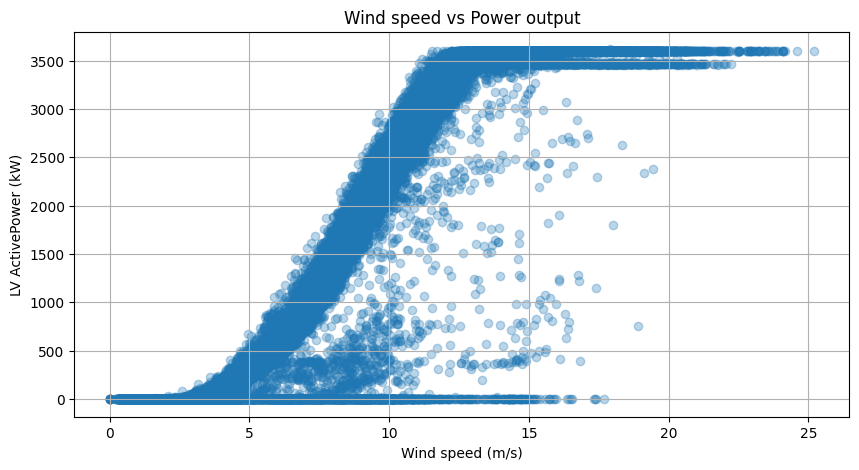

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(df['Wind Speed (m/s)'],df['LV ActivePower (kW)'],alpha=0.3)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind speed vs Power output')
plt.grid(True)
plt.show()

In [14]:
features = ['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
target = 'LV ActivePower (kW)'

x=df[features]
y=df[target]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [17]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:",r2_score(y_test, y_pred))


RMSE: 397.47286234181223
R2 Score: 0.9074116013046678


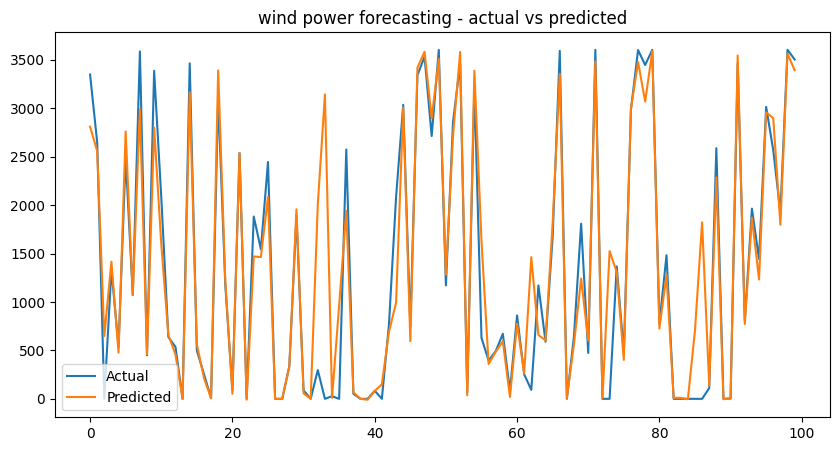

In [18]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('wind power forecasting - actual vs predicted')
plt.show()